# Data Exploration

## Objective
This notebook performs comprehensive exploratory data analysis (EDA) on the Online Shoppers Intention dataset to understand:
- Dataset structure and basic statistics
- Target variable distribution (purchase intention)
- Feature distributions and relationships
- Data quality issues (missing values, outliers)
- Patterns in online shopper behavior

## Dataset Overview
The dataset contains information about online shopping sessions, including:
- **Page analytics**: Administrative, Informational, ProductRelated pages and durations
- **User behavior metrics**: BounceRates, ExitRates, PageValues
- **Session context**: SpecialDay, Month, Weekend
- **User demographics**: OperatingSystems, Browser, Region, TrafficType, VisitorType
- **Target**: Revenue (purchase made: TRUE/FALSE)

## 1. Data Loading and Basic Information

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
df=pd.read_csv("../data/raw/online_shoppers_intention.csv")

print(f"Dataset shape: {df.shape}")
print(f"Number of samples: {df.shape[0]}")

Dataset shape: (12330, 18)
Number of samples: 12330


In [200]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [201]:
len(df.columns)

18

In [202]:
print("Dataset Info:")
print("=" * 50)
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficT

## 2. Data Quality

In [203]:
# Missing values
missing_values = df.isnull().sum()
missing_values

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [204]:
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"Found {duplicates} duplicate rows ({duplicates/len(df)*100:.2f}% of data)")
else:
    print("No duplicate rows found!")

Found 125 duplicate rows (1.01% of data)


## 3. Target Variable Analysis ``Revenue``

In [205]:
target_counts = df['Revenue'].value_counts()


print("Revenue Distribution:")
print("=" * 45)
print(f"FALSE (No Purchase): {target_counts[False]:,} ({(target_counts[False] /((target_counts[False]+target_counts[True])))*100:.2f}%)")
print(f"TRUE (Purchase):     {target_counts[True]:,} ({(target_counts[True] / (target_counts[True]+target_counts[False]))*100:.2f}%)")
print(f"\nClass Imbalance Ratio: {target_counts[False]/target_counts[True]:.2f}:1")

Revenue Distribution:
FALSE (No Purchase): 10,422 (84.53%)
TRUE (Purchase):     1,908 (15.47%)

Class Imbalance Ratio: 5.46:1


In [206]:
target_counts

Revenue
False    10422
True      1908
Name: count, dtype: int64

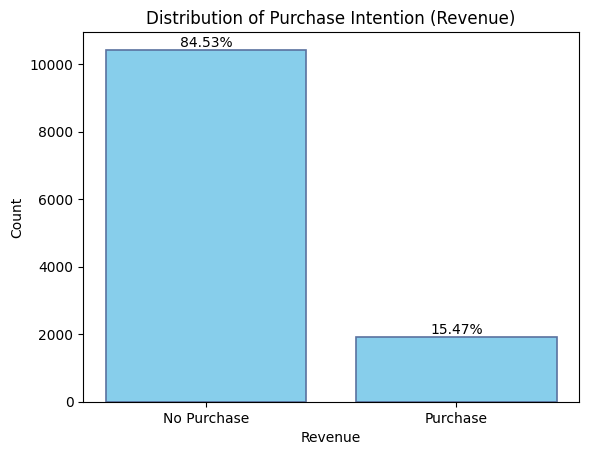

In [218]:
# Visualize target distribution
percentages=[f"{(target_counts[False] /((target_counts[False]+target_counts[True])))*100:.2f}%",f"{(target_counts[True] /((target_counts[False]+target_counts[True])))*100:.2f}%"]
bars=plt.bar(["No Purchase","Purchase"],target_counts,color="skyblue",edgecolor="#5A72A0",linewidth=1.2)
plt.bar_label(bars, labels=percentages,label_type='edge')
plt.ylabel("Count")
plt.xlabel("Revenue")
plt.title("Distribution of Purchase Intention (Revenue)")
plt.grid(False)
plt.savefig("../reports/figures/target_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

> **``Key Insight``: The dataset is imbalanced with significantly more non-purchase sessions.**

## 4. Numerical Features Analysis

-   **Numerical (continuous):** `Administrative_Duration`, `Informational_Duration`, `ProductRelated_Duration`, `BounceRates`, `ExitRates`, `PageValues`, `SpecialDay`
-   **Numerical (discrete):** `Administrative`, `Informational`, `ProductRelated`
-   **Categorical:** `Month`, `OperatingSystems`, `Browser`, `Region`, `TrafficType`, `VisitorType`,`Weekend`, `Revenue`

In [208]:
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
7502,3,180.40,0,0.0,12,2646.400000,0.042857,0.052381,0.000000,0.0,Oct,2,2,2,20,Returning_Visitor,False,False
6180,0,0.00,0,0.0,153,4565.930621,0.001307,0.006432,6.189215,0.0,Aug,2,2,4,1,Returning_Visitor,True,True
6537,0,0.00,0,0.0,26,587.900000,0.023077,0.037179,0.000000,0.0,June,3,2,5,13,Returning_Visitor,False,False
10469,5,176.25,0,0.0,13,1183.050000,0.000000,0.037500,0.000000,0.0,Dec,2,2,1,2,Returning_Visitor,False,False
4091,0,0.00,0,0.0,2,10.000000,0.000000,0.100000,0.000000,0.0,May,1,1,1,3,Returning_Visitor,False,False


In [209]:
df["OperatingSystems"]=df["OperatingSystems"].astype('object')
df["Browser"]=df["Browser"].astype('object')
df["Region"]=df["Region"].astype('object')
df["TrafficType"]=df["TrafficType"].astype('object')

In [210]:
numerical_cols = df.select_dtypes(include=[np.number,np.float32]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object","bool"]).columns.tolist()

In [211]:
numerical_cols

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay']

In [212]:
categorical_cols

['Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Revenue']

In [213]:
# Summary Statistics of  Numerical cols
df[numerical_cols].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


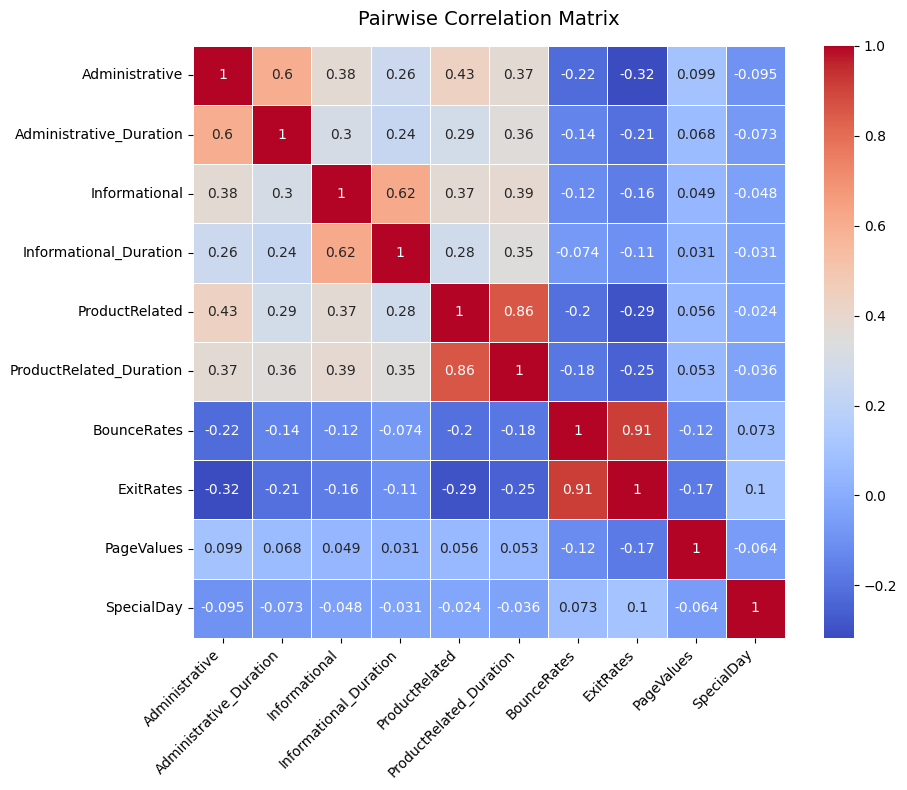

In [214]:
# Correlation Matrix

corr = df[numerical_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, 
            annot=True, 
            cmap="coolwarm", 
            cbar=True, 
            square=True,
            linewidths=0.5,
            annot_kws={"size":10})

plt.title("Pairwise Correlation Matrix", fontsize=14, pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("../reports/figures/Pairwise_Correlation_Matrix.png", dpi=300, bbox_inches='tight')
plt.show()

**``Key Insight``:**

-   **ProductRelated** and **ProductRelated_Duration** show a very strong positive correlation **(~0.86)**, indicating time spent on product pages scales closely with the number of product-related visits.
-   **BounceRates** and **ExitRates** are highly correlated **(~0.91)**, suggesting sessions with high bounce also tend to end on the same page.
-   **Informational** and **Informational_Duration** are moderately correlated **(~0.62)**, consistent with more info pages leading to longer info time.
-   **Administrative** and **Administrative_Duration** correlate **(~0.60)**, showing a similar pattern for admin pages.

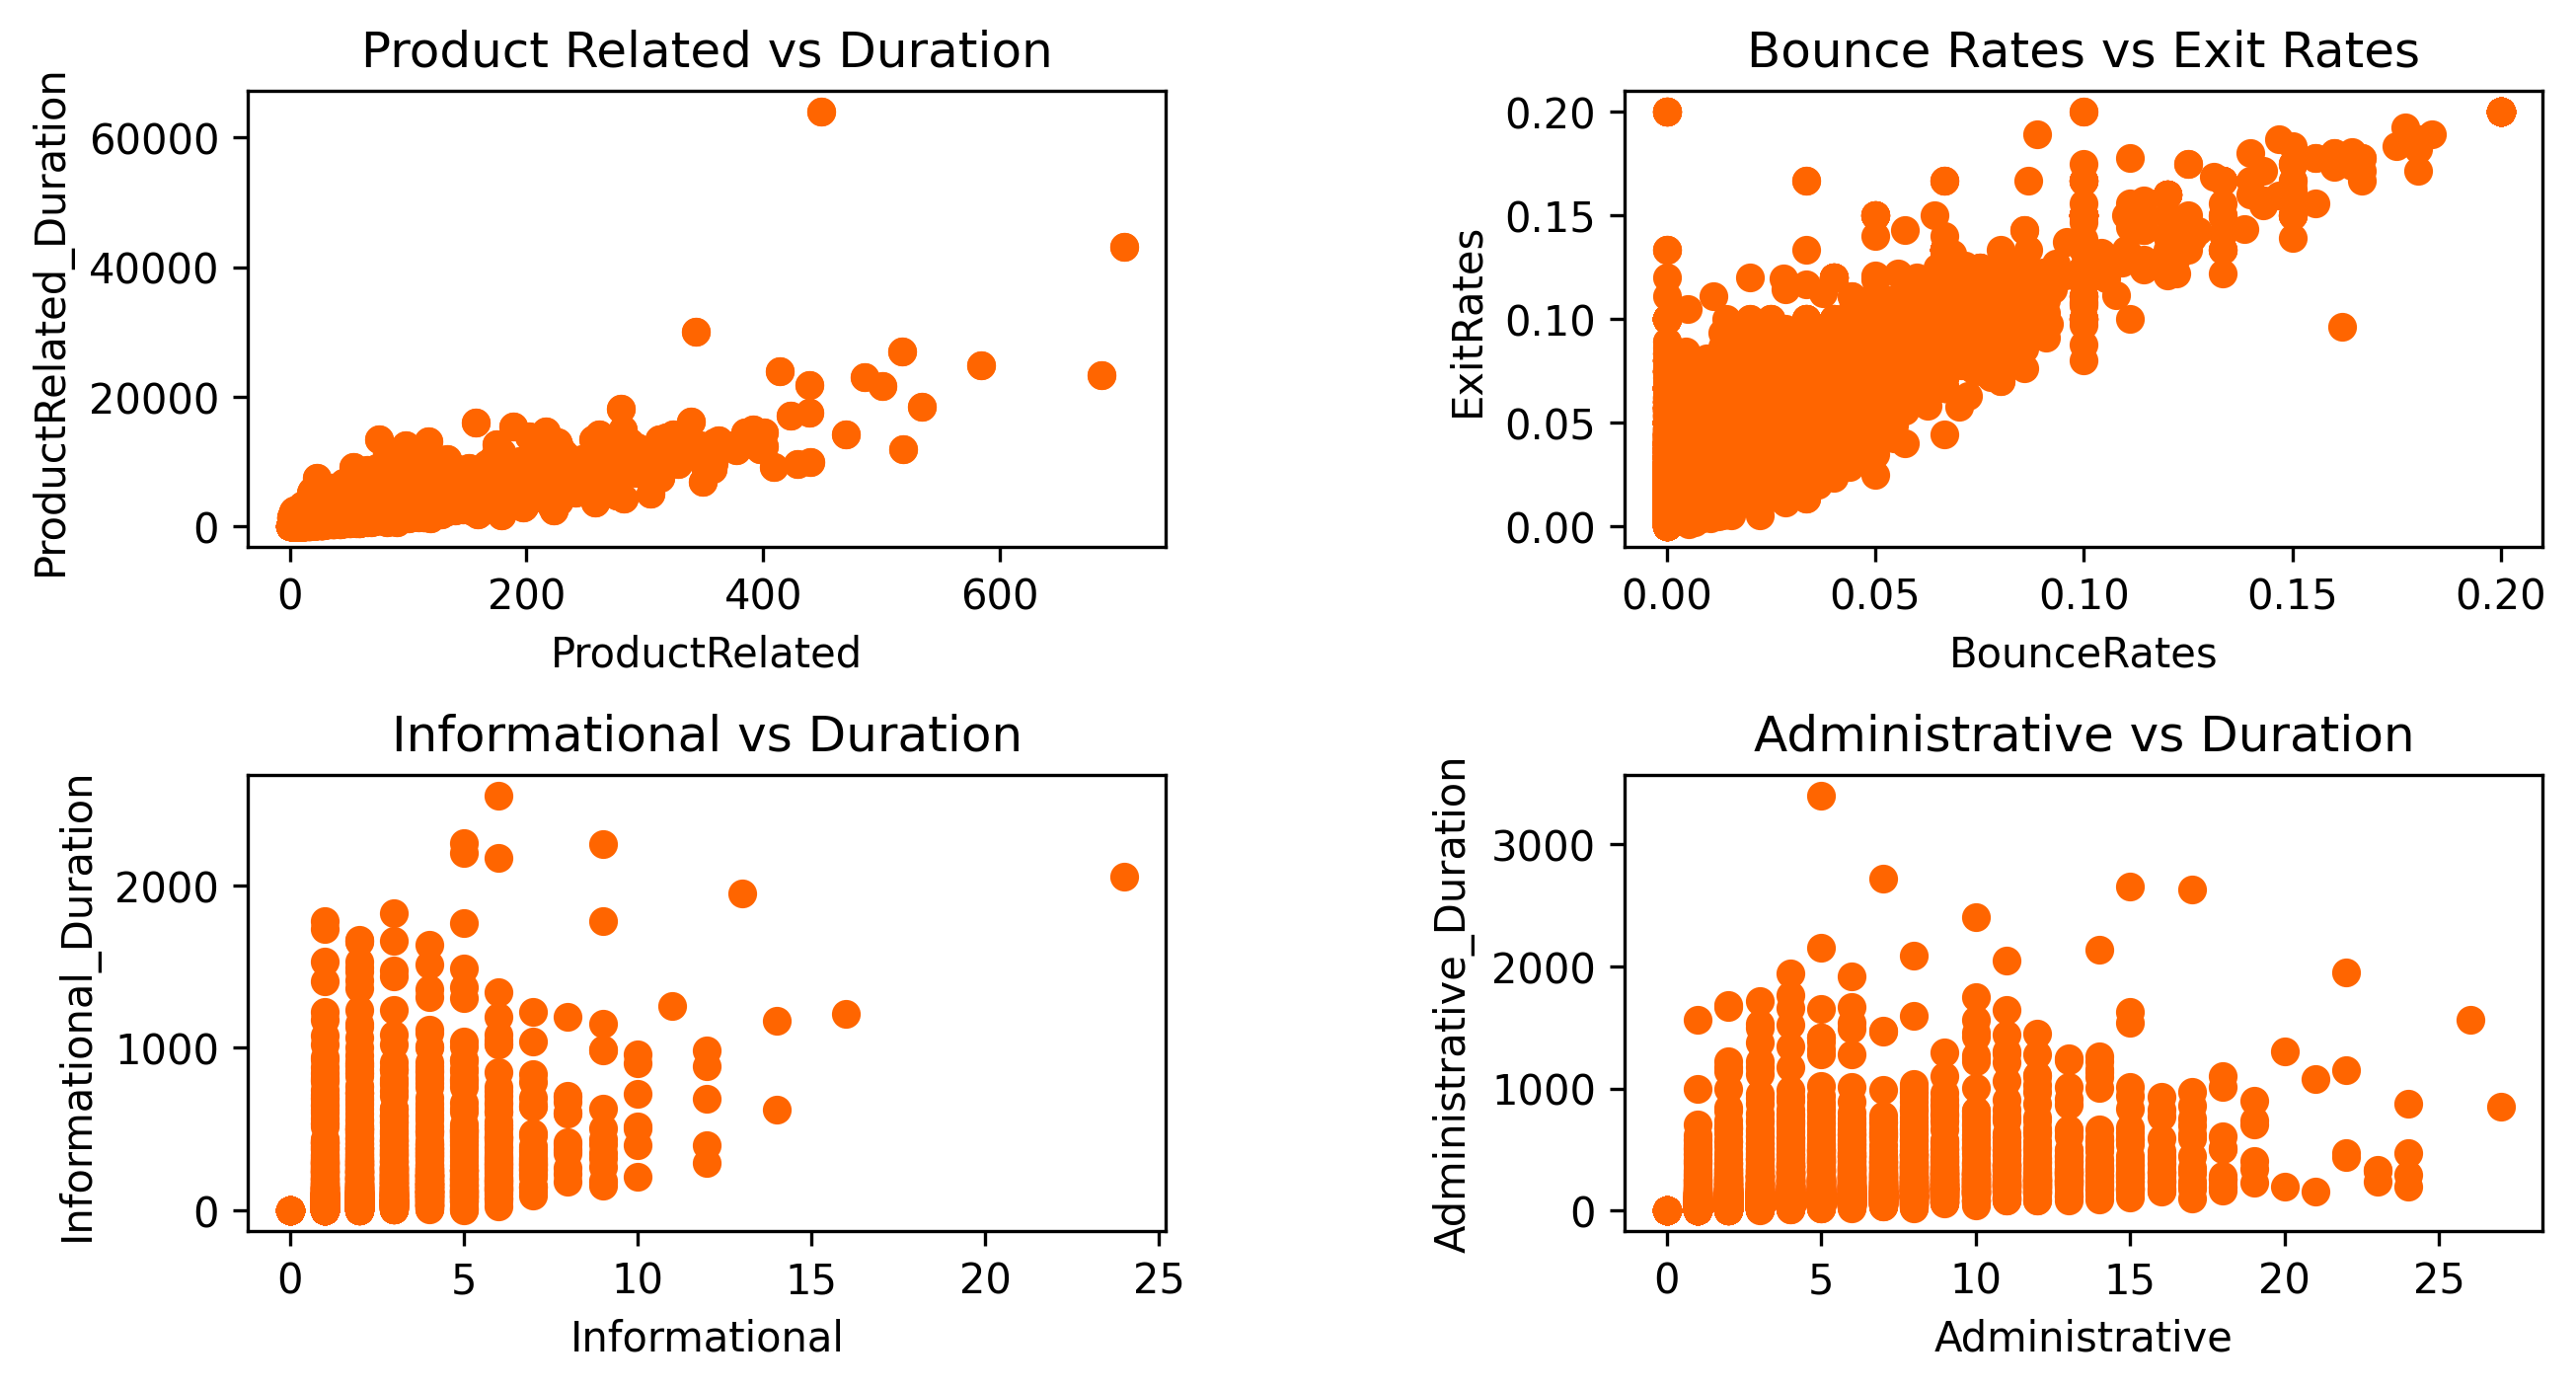

In [215]:
# Scatter plot 
fig,ax=plt.subplots(2,2,gridspec_kw={'wspace': 0.5, 'hspace': 0.5},figsize=(10,5), dpi=300)
ax[0,0].scatter(df["ProductRelated"],df["ProductRelated_Duration"],c="#FF6500")


ax[0,0].scatter(df["ProductRelated"], df["ProductRelated_Duration"], c="#FF6500")
ax[0,0].set_title("Product Related vs Duration")
ax[0,0].set_xlabel("ProductRelated")
ax[0,0].set_ylabel("ProductRelated_Duration")

ax[0,1].scatter(df["BounceRates"], df["ExitRates"], c="#FF6500")
ax[0,1].set_title("Bounce Rates vs Exit Rates")
ax[0,1].set_xlabel("BounceRates")
ax[0,1].set_ylabel("ExitRates")

ax[1,0].scatter(df["Informational"], df["Informational_Duration"], c="#FF6500")
ax[1,0].set_title("Informational vs Duration")
ax[1,0].set_xlabel("Informational")
ax[1,0].set_ylabel("Informational_Duration")

ax[1,1].scatter(df["Administrative"], df["Administrative_Duration"], c="#FF6500")
ax[1,1].set_title("Administrative vs Duration")
ax[1,1].set_xlabel("Administrative")
ax[1,1].set_ylabel("Administrative_Duration")
fig.savefig("../reports/figures/scatter_plots.png", dpi=300, bbox_inches='tight')

plt.show()

**``Key Insight``:**

    
-   **ProductRelated vs ProductRelated_Duration:**
    
    -   More product-related pages generally mean longer durations.
-   **BounceRates vs ExitRates:**
    
    -   Pages with higher bounce rates tend to also have higher exit rates, which can indicate poor engagement or irrelevant content.
-   **Informational vs Informational_Duration:**
    
    -   There is **no clear linear relationship**.
    -   Some users spend a lot of time on informational pages even with fewer visits, suggesting that **content engagement matters more than visit count**.
-   **Administrative vs Administrative_Duration:**
    
    -   Similar to informational pages, there's **no strong correlation**.
    -   Users may spend varying amounts of time on administrative pages regardless of how many they visit.

## 5. Categorical Features Analysis

In [216]:
# Unique values
print("Categorical Features Analysis:")
print("=" * 40)

for col in categorical_cols:
    if col != 'Revenue':  # Skip target variable
        unique_vals = df[col].nunique()
        print(f"\n{col}:")
        print(f"  Unique values: {unique_vals}")
        value_counts = df[col].value_counts()
        for val, count in value_counts.items():
            print(f"    {val}: {count} ({count/len(df)*100:.1f}%)")

Categorical Features Analysis:

Month:
  Unique values: 10
    May: 3364 (27.3%)
    Nov: 2998 (24.3%)
    Mar: 1907 (15.5%)
    Dec: 1727 (14.0%)
    Oct: 549 (4.5%)
    Sep: 448 (3.6%)
    Aug: 433 (3.5%)
    Jul: 432 (3.5%)
    June: 288 (2.3%)
    Feb: 184 (1.5%)

OperatingSystems:
  Unique values: 8
    2: 6601 (53.5%)
    1: 2585 (21.0%)
    3: 2555 (20.7%)
    4: 478 (3.9%)
    8: 79 (0.6%)
    6: 19 (0.2%)
    7: 7 (0.1%)
    5: 6 (0.0%)

Browser:
  Unique values: 13
    2: 7961 (64.6%)
    1: 2462 (20.0%)
    4: 736 (6.0%)
    5: 467 (3.8%)
    6: 174 (1.4%)
    10: 163 (1.3%)
    8: 135 (1.1%)
    3: 105 (0.9%)
    13: 61 (0.5%)
    7: 49 (0.4%)
    12: 10 (0.1%)
    11: 6 (0.0%)
    9: 1 (0.0%)

Region:
  Unique values: 9
    1: 4780 (38.8%)
    3: 2403 (19.5%)
    4: 1182 (9.6%)
    2: 1136 (9.2%)
    6: 805 (6.5%)
    7: 761 (6.2%)
    9: 511 (4.1%)
    8: 434 (3.5%)
    5: 318 (2.6%)

TrafficType:
  Unique values: 20
    2: 3913 (31.7%)
    1: 2451 (19.9%)
    3: 2052 (16

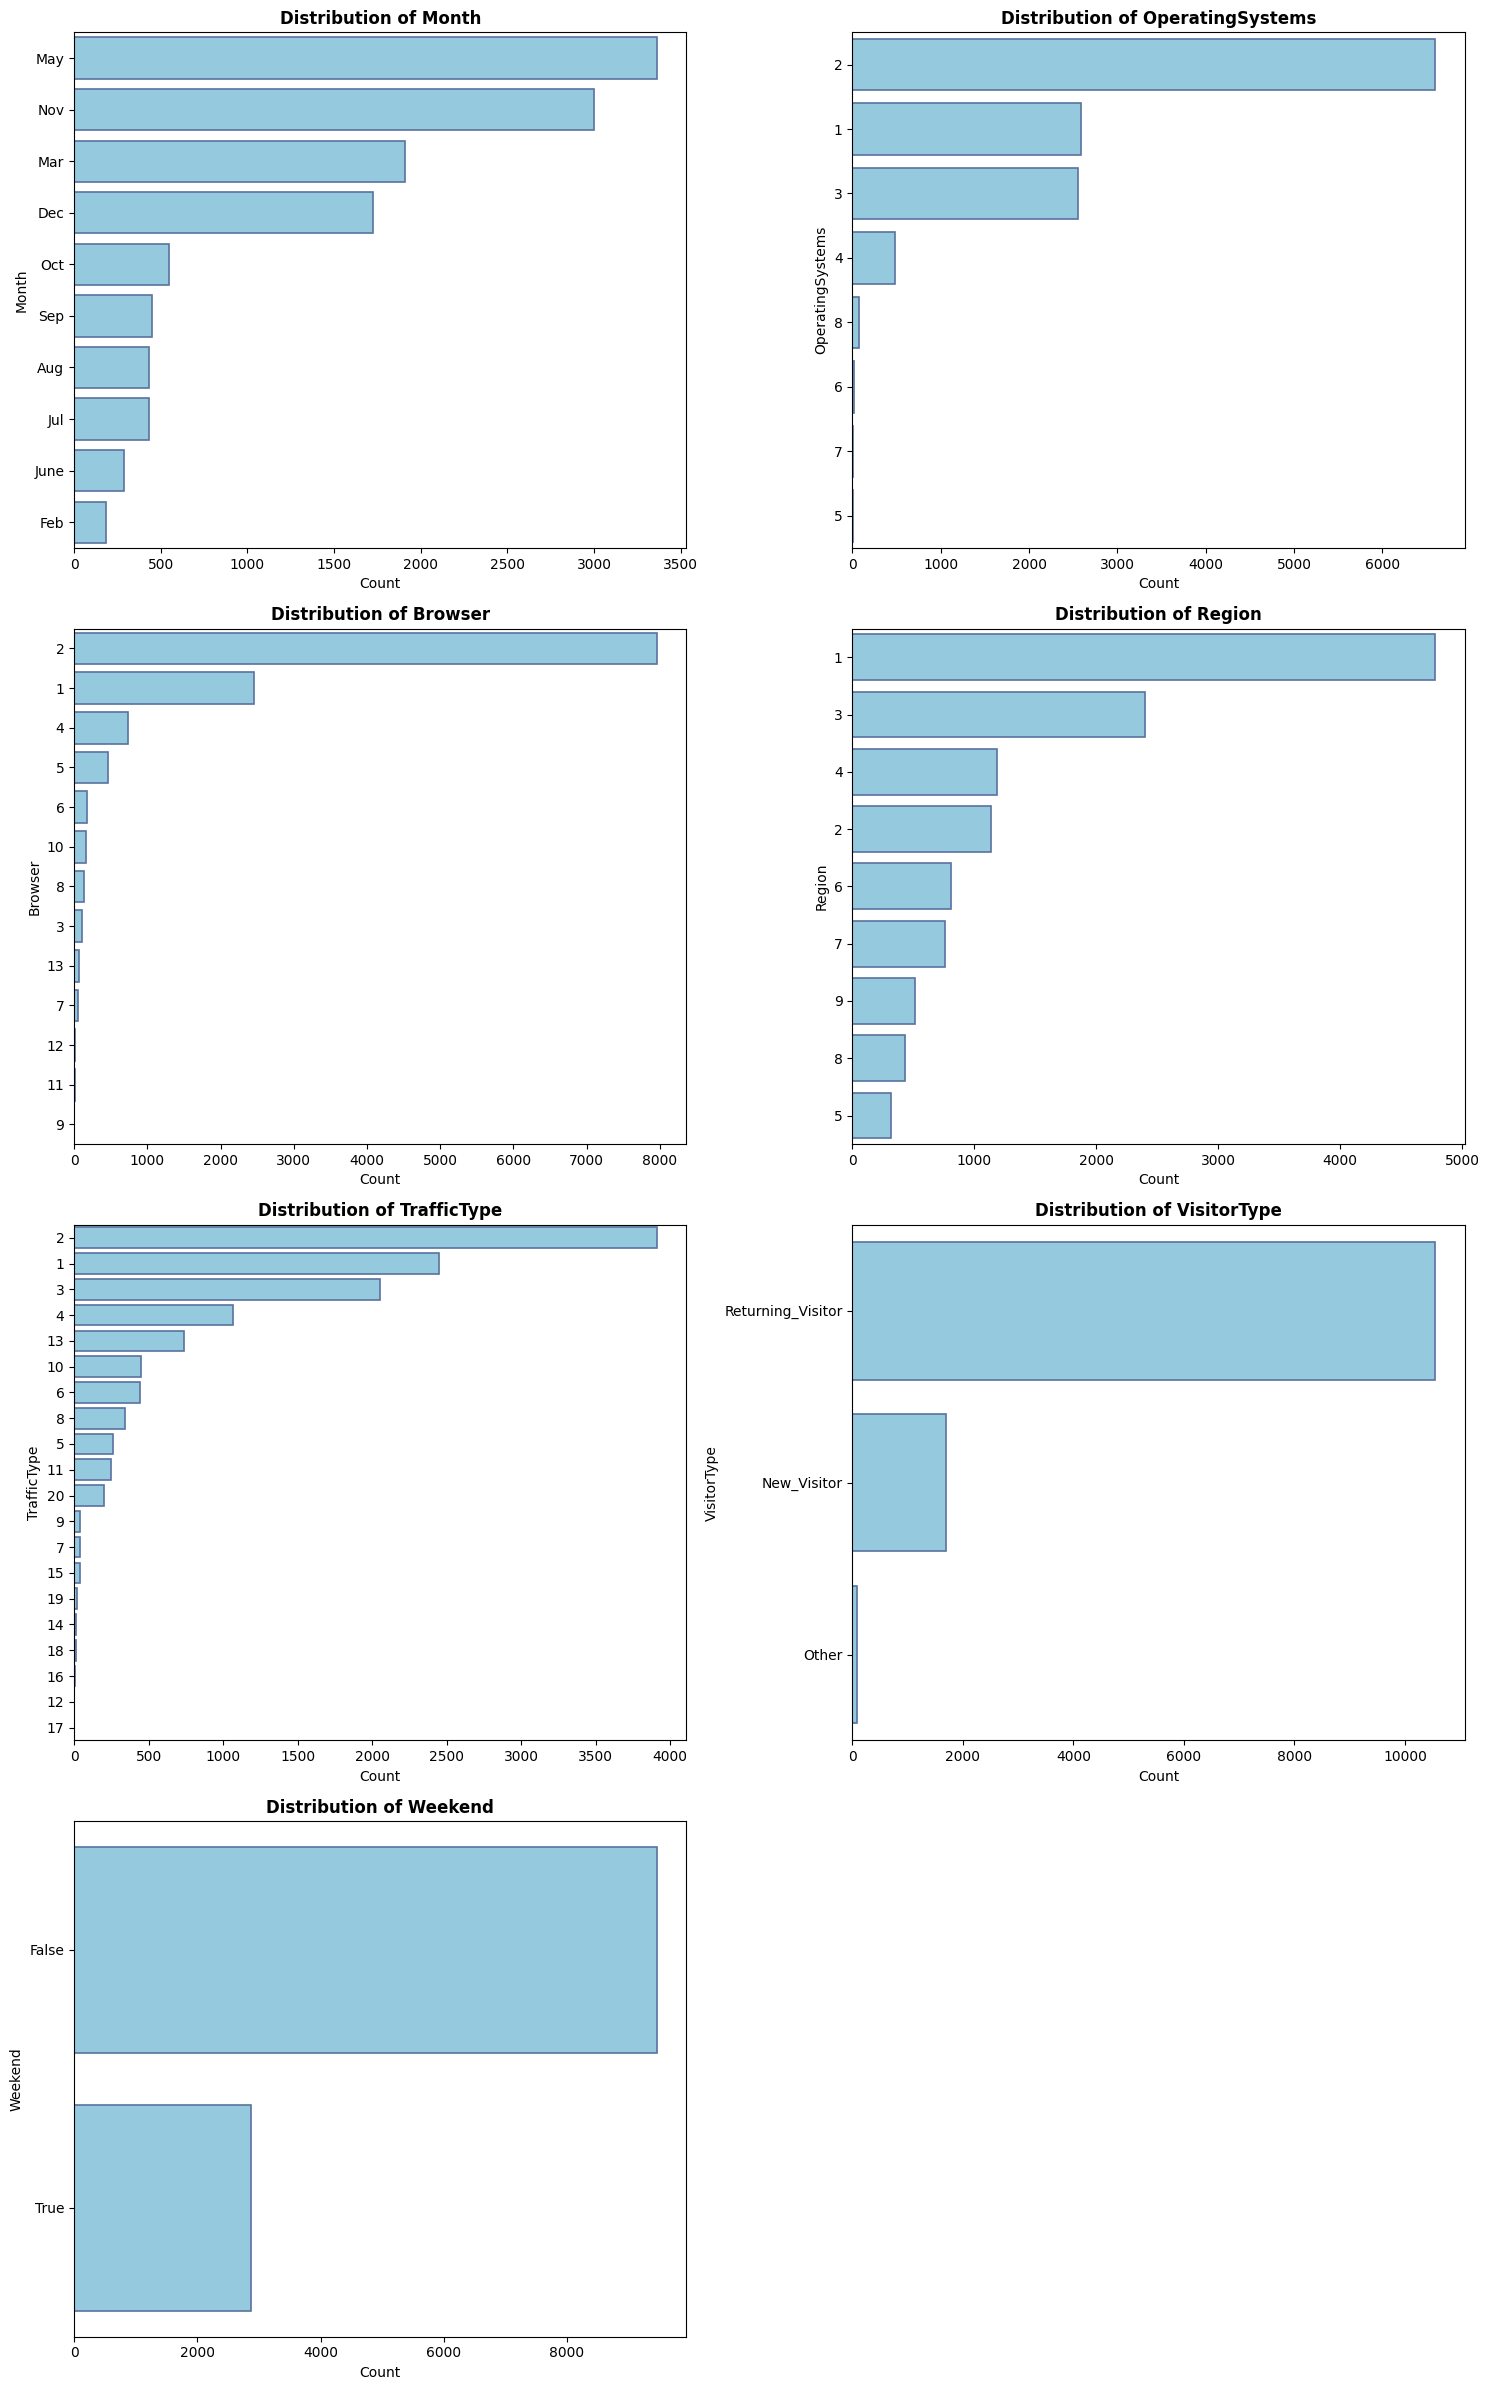

In [217]:
# Visualize categorical features
cat_to_plot = [col for col in categorical_cols if col != 'Revenue']
n_cols = 2
n_rows = (len(cat_to_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 6*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes

for i, col in enumerate(cat_to_plot):
        sns.countplot(data=df, y=col, ax=axes[i], order=df[col].value_counts().index,color="skyblue",edgecolor="#5A72A0",linewidth=1.2 )
        axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('Count', fontsize=10)


for i in range(len(cat_to_plot), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.savefig('../reports/figures/categorical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

**Month**

-   The dataset is **heavily skewed toward May, November, March, and December**.
-   Other months (June, July, August, September, October, February) have much lower representation.  
    👉 This could reflect **seasonality in customer behavior** (e.g., holiday sales in November/December, spring promotions in March/May).

----------

**Operating Systems**

-   **OS 2 dominates** the dataset, followed by OS 1.
-   Other operating systems are almost negligible.  
    👉 This means the dataset is **heavily dependent on a small number of OS platforms**, so decisions may mostly apply to those users.

----------

**Browser**

-   **Browser 2** is the clear leader, followed by Browser 1.
-   The rest (4, 5, 6, …) contribute very little.  
    👉 Similar to OS, the dataset is **concentrated in just a few browsers**.

----------

**Region**

-   **Region 1** is dominant, with Region 3, 4, 2, 7, 9, 8, 5 making up smaller portions.  
    👉 Suggests that **traffic/customers are largely concentrated in one geographic region**.

----------

**Traffic Type**

-   **Traffic Type 2** is by far the largest, followed by Type 13, 3, and 4.
-   Many traffic types exist, but most are very small.  
    👉 Indicates that **a few traffic sources drive the majority of visits**.

----------

**Visitor Type**

-   **Returning Visitors make up the majority**, followed by New Visitors.
-   “Other” is negligible.  
    👉 Suggests strong **customer loyalty/retention**, but attracting new visitors is less common.

----------

 **Weekend**

-   **Most visits occur on weekdays** (False), while weekends (True) are much fewer.  
    👉 Indicates **weekday browsing is significantly higher**, possibly work-related browsing.